# Hierarchical Clustering

#### 1. Introduction
#### 2. Importing Required Libraries
#### 3. Loading Processed Data
#### 4. Dendrogram Analysis
#### 5. Applying Agglomerative Clustering
#### 6. Cluster Visualization
#### 7. Cluster Interpretation


## Introduction
Hierarchical clustering builds a hierarchy of clusters without requiring
the number of clusters upfront. Agglomerative clustering starts with
each data point as its own cluster and merges them step by step.

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

## Loading Processed Data

In [2]:
with open("../data/processed/mall_customers_scaled.pkl", "rb") as f:
    df_scaled = pickle.load(f)

df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Recency,Frequency,Monetary
0,1.128152,-1.424569,-1.738999,-0.434801,0.434801,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704,-1.195704,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913,1.715913,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418,-1.040418,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980,0.395980,-1.662660,-0.395980


## Dendrogram Analysis

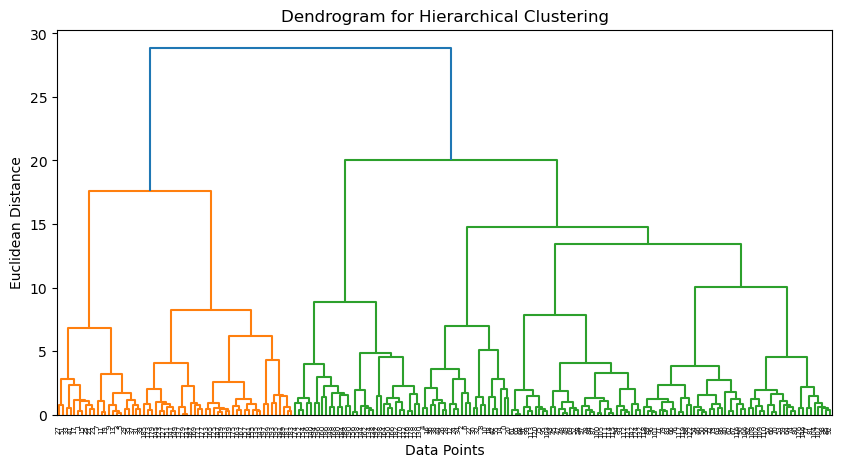

In [3]:
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("data Points")
plt.ylabel("Euclidean Distance")
plt.show()

+ The largest vertical gap (biggest jump in Euclidean distance) is around 25–30

+ If we draw a horizontal cut line just below that (≈20–22), the tree splits into 3 major branches

+ Below that level, merges happen at much smaller distances

+ Therefore, the optimal number of clusters for hierarchical clustering is 3.
  

## Applying Agglomerative Clustering 

In [4]:
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = agglo.fit_predict(df_scaled)

## Attach Cluster Labels

In [5]:
df_clustered = df_scaled.copy()
df_clustered['Cluster'] = cluster_labels

df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Recency,Frequency,Monetary,Cluster
0,1.128152,-1.424569,-1.738999,-0.434801,0.434801,-1.738999,-0.434801,1
1,1.128152,-1.281035,-1.738999,1.195704,-1.195704,-1.738999,1.195704,0
2,-0.886405,-1.352802,-1.700830,-1.715913,1.715913,-1.700830,-1.715913,1
3,-0.886405,-1.137502,-1.700830,1.040418,-1.040418,-1.700830,1.040418,0
4,-0.886405,-0.563369,-1.662660,-0.395980,0.395980,-1.662660,-0.395980,1


## PCA for Visualization

In [6]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
df_pca['Cluster'] = cluster_labels


## Visualizing Hierarchical Clusters

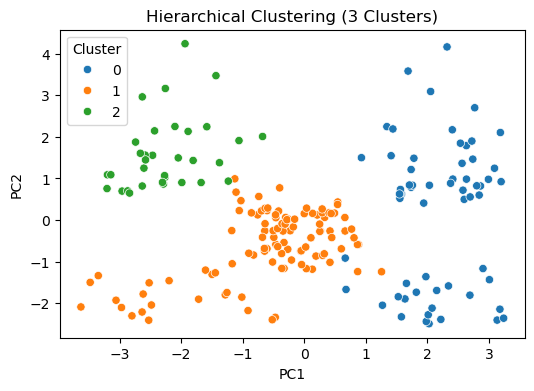

In [7]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=df_pca,
    palette='tab10'
)
plt.title("Hierarchical Clustering (3 Clusters)")
plt.show()

## Cluster Profiling

In [8]:
df_clustered.groupby('Cluster').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Recency,Frequency,Monetary
Cluster,,,,,,,
0,0.038310,-0.62337,0.156332,1.197613,-1.197613,0.156332,1.197613
1,-0.088184,0.30054,-0.428996,-0.278050,0.278050,-0.428996,-0.278050
2,0.212444,0.18692,1.089009,-1.320639,1.320639,1.089009,-1.320639


## Key Interpretations
+ Hierarchical clustering grouped customers into three broad segments.
+ Cluster 0 represents high-value and actively engaged customers, making
  them ideal targets for loyalty and premium programs.
+ Cluster 2 includes customers with high income but low spending, indicating strong potential   for         conversion through personalized marketing.
+ Cluster 1 represents low-engagement customers requiring reactivation strategies.